Enter The vegetable name :  Potato


Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.5677 - val_loss: 0.2332
Epoch 2/50
1/1 [==============================] - 0s 49ms/step - loss: 0.5484 - val_loss: 0.2152
Epoch 3/50
1/1 [==============================] - 0s 54ms/step - loss: 0.5357 - val_loss: 0.1978
Epoch 4/50
1/1 [==============================] - 0s 57ms/step - loss: 0.5184 - val_loss: 0.1800
Epoch 5/50
1/1 [==============================] - 0s 83ms/step - loss: 0.4931 - val_loss: 0.1621
Epoch 6/50
1/1 [==============================] - 0s 73ms/step - loss: 0.4943 - val_loss: 0.1445
Epoch 7/50
1/1 [==============================] - 0s 50ms/step - loss: 0.4558 - val_loss: 0.1275
Epoch 8/50
1/1 [==============================] - 0s 55ms/step - loss: 0.4376 - val_loss: 0.1109
Epoch 9/50
1/1 [==============================] - 0s 56ms/step - loss: 0.4234 - val_loss: 0.0942
Epoch 10/50
1/1 [==============================] - 0s 56ms/step - loss: 0.3941 - val_loss: 0.0768
Epoch 11/50
1/1 [==============

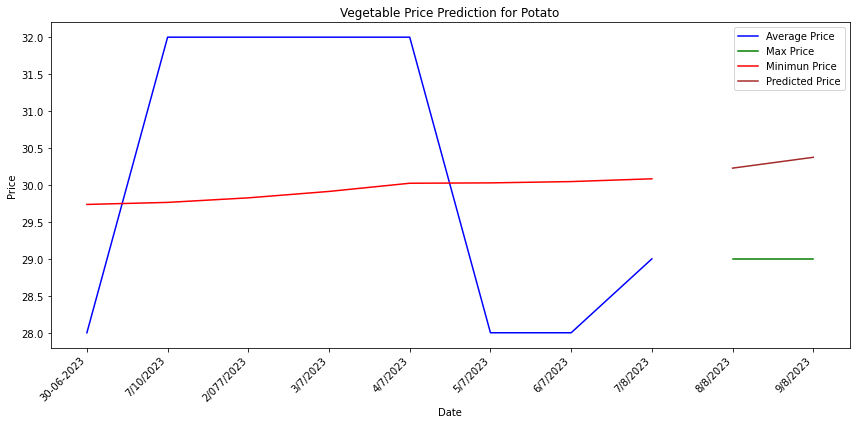

Test Accuracy:  4.72%
1/1 [==============================] - 0s 24ms/step
Nearest Future Predicted Price for Potato: 30.52


In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

file = input("Enter The vegetable name : ")
data = pd.read_csv(file+'.csv')


selected_attributes = ['Prices']
data_selected = data[selected_attributes].values

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_selected)

time_steps = 20

X = []
y = []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps])
    y.append(data_scaled[i+time_steps])
X, y = np.array(X), np.array(y)

split_ratio = 0.8
split_idx = int(split_ratio * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(time_steps, len(selected_attributes))))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(selected_attributes)))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


train_predictions_actual = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train)
test_predictions_actual = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test)
test_accuracy = model.evaluate(X_test, y_test)
test_accuracy = test_accuracy*100

vegetable_names = data['Date'][time_steps:].values
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))


plt.plot(vegetable_names[:split_idx], y_train_actual, label='Average Price' , color = 'blue')

plt.plot(vegetable_names[split_idx:], y_test_actual, label='Max Price' , color = 'green')

plt.plot(vegetable_names[:split_idx], train_predictions_actual, label='Minimun Price' , color = 'red')

plt.plot(vegetable_names[split_idx:], test_predictions_actual, label='Predicted Price' , color = 'Brown')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Price Prediction for '+file)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
print(f"Test Accuracy: {test_accuracy: .2f}%")

# Predicting prices for the nearest future of the input vegetable
nearest_future_predictions = model.predict(np.array([data_scaled[-time_steps:]]))
nearest_future_predictions_actual = scaler.inverse_transform(nearest_future_predictions)

print(f"Nearest Future Predicted Price for {file}: {nearest_future_predictions_actual[0][0]:.2f}")